# Project Notebook

The main stuff will be done here!

## What is needed?

For this, I will use `mysql`, which I will host locally. This needs to be runned for `pymssql` to work. After that I can make queries with pymssql when I connect to my local hosted server. This makes development easier. As I use a different machine from last time when I used these, I have to install them again.

**Mysql** local install:

1. Download it from their site! 
2. Install the necessary tools! (I did all)
3. ADD IT TO `PATH`
4. Check with `mysql -V` in terminal if it is installed correctly (restart my be needed needed)
5. ENJOY!

`On windows, it creates a very okeyish config file with reasonable variables.`

`On linux, there is no need to be added to path, but the config file is empty.`

**pymssql**:

1. `pip install -u pymsql`

**.ENV**

It is a good practice to create a new user with granted permissions (don't use root), but it's necessary to hide these credentials if the work is shared: create an .env file that has the information and block its upload to github!

**Helpful stuff**

https://www.digitalocean.com/community/tutorials/a-basic-mysql-tutorial

https://www.digitalocean.com/community/tutorials/how-to-create-a-new-user-and-grant-permissions-in-mysql

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import re

import sys
import os
import pathlib
import glob

import pymssql

import mysql.connector
from mysql.connector import Error
from mysql.connector import OperationalError, ProgrammingError

from dotenv import load_dotenv
load_dotenv()

True

**Usage of .env is essential in hidin credenials**

In [2]:
usr = os.getenv('user')
psswrd = os.getenv('password')

Let's test i this works

In [3]:
#how to use it
"""
# This opens a connection to the MS SQL server
conn = pymssql.connect(user=usr, 
                       password=psswrd,
                       host='localhost',
                       database='sys')

cursor = conn.cursor()
# A test query
res = cursor.execute('select * from shot;')
print(cursor.fetchone())
"""

db_connection = mysql.connector.connect(user=usr,
                                        passwd=psswrd ,
                                        host='localhost',
                                        database = 'sys',
                                        use_pure=True)

db_cursor = db_connection.cursor()
db_cursor.execute('select* from session;')
for db in db_cursor:
    print(db)

db_connection.close()
db_cursor.close()



(48, 8, 'szaboadamg@localhost', 'sys', 'Query', 'executing', 1, 'select* from session', '29.79 ms', None, '1.61 ms', 0, 0, 0, 2, 0, 'YES', None, None, '1.58 MiB', None, None, None, '3.66 ms', 'ACTIVE', 'NO', '1732', None)


True

Now I just need to create this course's database and create the table that has the .csv loaded in...

```
    load data infile 'data\_linklist.csv'
    into table linklist
    fields terminated by ','
    lines terminated by '\n'
    ignore 1 rows;

```

THe problem is that the setup file has 2 rows specifying where the mysql server can take files from. One of them prevents `local` file insertion, the other gives a strict path.

**But this needs a well defined table beforehand.** With these, the first 3 task is complete:

1. Get the data from kaggle
2. Load the tables into a database
3. Create linklist

### Loading in the decodings

In [140]:
decoder0 = pd.read_csv("data/_decoding.csv")
decoder1 = pd.read_csv("data/_decoding.csv")
for i in range(len(decoder1[' uuid'])):
    decoder0[' uuid'].loc[i] = re.sub(r'\r', '', decoder0[' uuid'].loc[i]).strip()
    decoder1[' uuid'].loc[i] = re.sub(r'\r', '', decoder1[' uuid'].loc[i]).strip()
decoderd = dict(zip(decoder1[' uuid'], decoder1['character']))

## 4. Network Visualizations

Visualizing the networks with the nodes and links. Nodes that are more connected shall be bigger.

In [4]:
import networkx as nx

In [5]:
db_connection = mysql.connector.connect(user=usr,
                                        passwd=psswrd ,
                                        host='localhost',
                                        database = 'datamodproj',
                                        use_pure=True)

Llist = []
count=0
db_cursor = db_connection.cursor()
db_cursor.execute('select* from linklist;')
for db in db_cursor:
    Llist.append(db)
    count=count+1

print(count)

db_connection.close()
db_cursor.close()

23036


True

In [6]:
Llist[1]

('a925ecc2-c223-5555-b66e-0b5b24122201',
 ' ee9c03ac-4251-5042-ac85-986db9228a17\r')

It's strange that the `\r` is present in the returned result of the query. Regex can remove, but I have never seen such thing before. Maybe due to the loading?

In [7]:
for i in range(len(Llist)):
    sub = list(Llist[i])
    sub[1] = re.sub(r'\r', '', sub[1]).strip()
    Llist[i] = tuple(sub)
    
Llist_a = np.array(Llist)
Llist[1]

('a925ecc2-c223-5555-b66e-0b5b24122201',
 'ee9c03ac-4251-5042-ac85-986db9228a17')

Fixed!

### Graph 

https://networkx.org/documentation/stable/tutorial.html

https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

In [8]:
# GRAPH

G = nx.Graph()

G.add_edges_from(Llist)

In [9]:
G.number_of_nodes(), G.number_of_edges()

(635, 11031)

This is less than the length of the linklist. Does it know that these eddes are weighted?

In [10]:
sum_node_deg = 0
for i in range(len(G.degree())):
    sum_node_deg = sum_node_deg + list(list(G.degree)[i])[1]
print(sum_node_deg) 

22062


**It knows. Yes!**

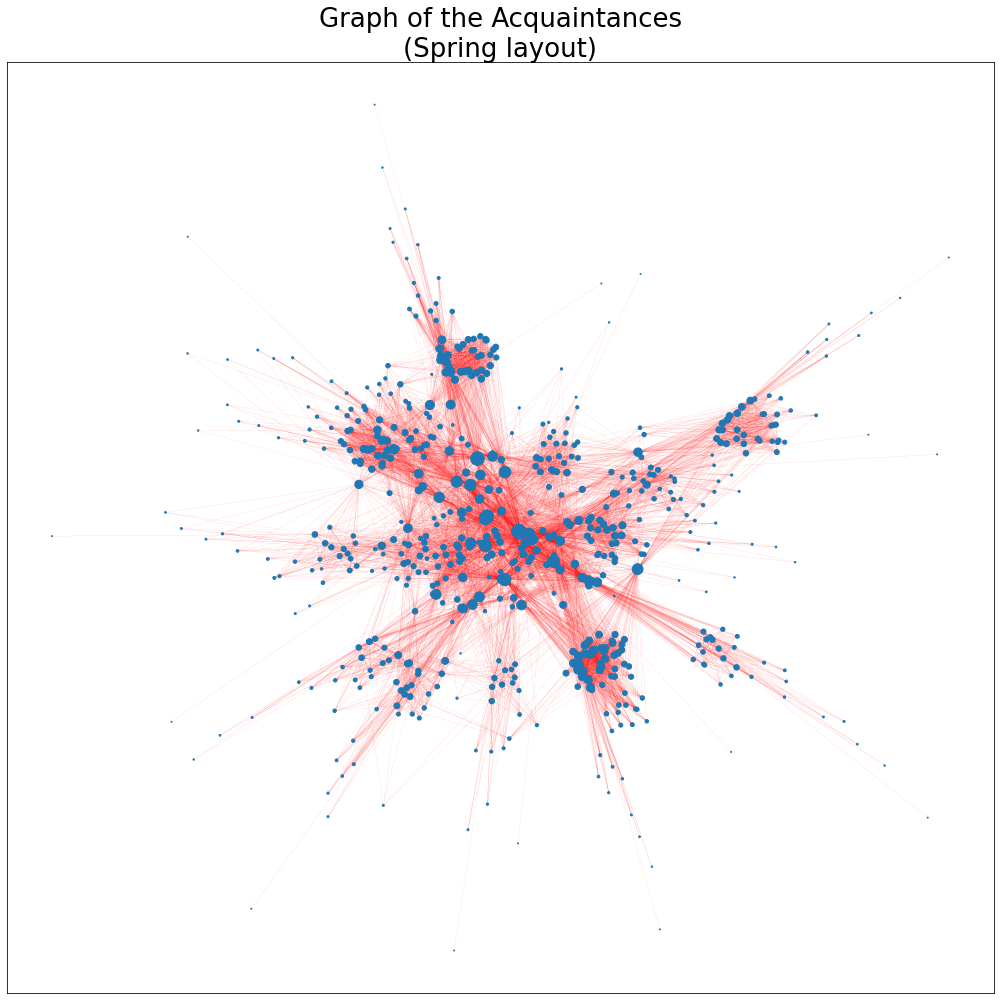

In [45]:
#Let's draw this
fig = plt.figure(figsize=(14,14))

plt.title('Graph of the Acquaintances\n(Spring layout)', fontsize=26)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,
                       pos,
                       nodelist = np.array(G.nodes),
                       cmap=plt.get_cmap('jet'), 
                       #node_color = values,
                       node_size = np.around(np.array(np.array(G.degree)[:,1], dtype=np.uint32)/np.max(np.array(np.array(G.degree)[:,1], dtype=np.uint32))*200))
nx.draw_networkx_edges(G,
                       pos,
                       width=0.05,
                       #edgelist=red_edges,
                       edge_color='r', 
                       arrows=True)

fig.tight_layout()

plt.show()

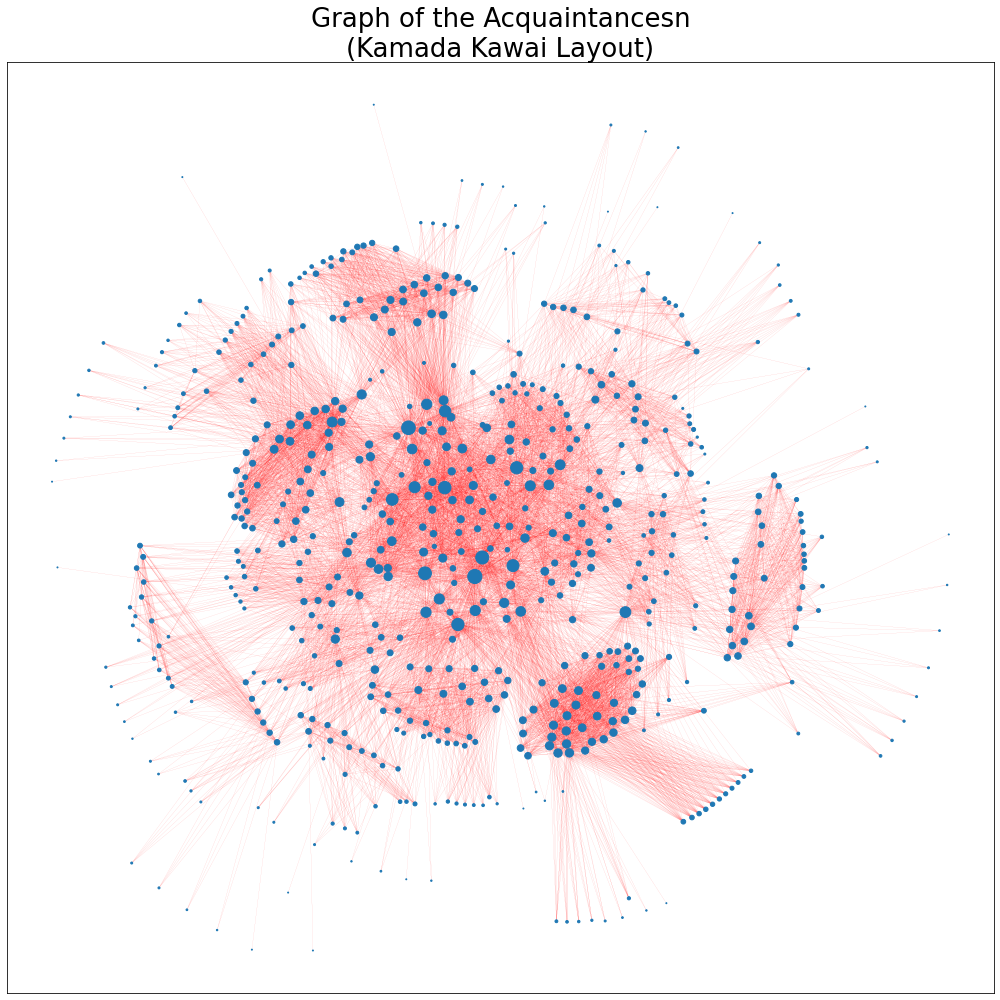

In [46]:
fig = plt.figure(figsize=(14,14))

plt.title('Graph of the Acquaintancesn\n(Kamada Kawai Layout)', fontsize=26)

pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G,
                       pos,
                       nodelist = np.array(G.nodes),
                       cmap=plt.get_cmap('jet'), 
                       #node_color = values,
                       node_size = np.around(np.array(np.array(G.degree)[:,1], dtype=np.uint32)/np.max(np.array(np.array(G.degree)[:,1], dtype=np.uint32))*200))
nx.draw_networkx_edges(G,
                       pos,
                       width=0.05,
                       #edgelist=red_edges,
                       edge_color='r', 
                       arrows=True)

fig.tight_layout()

plt.show()

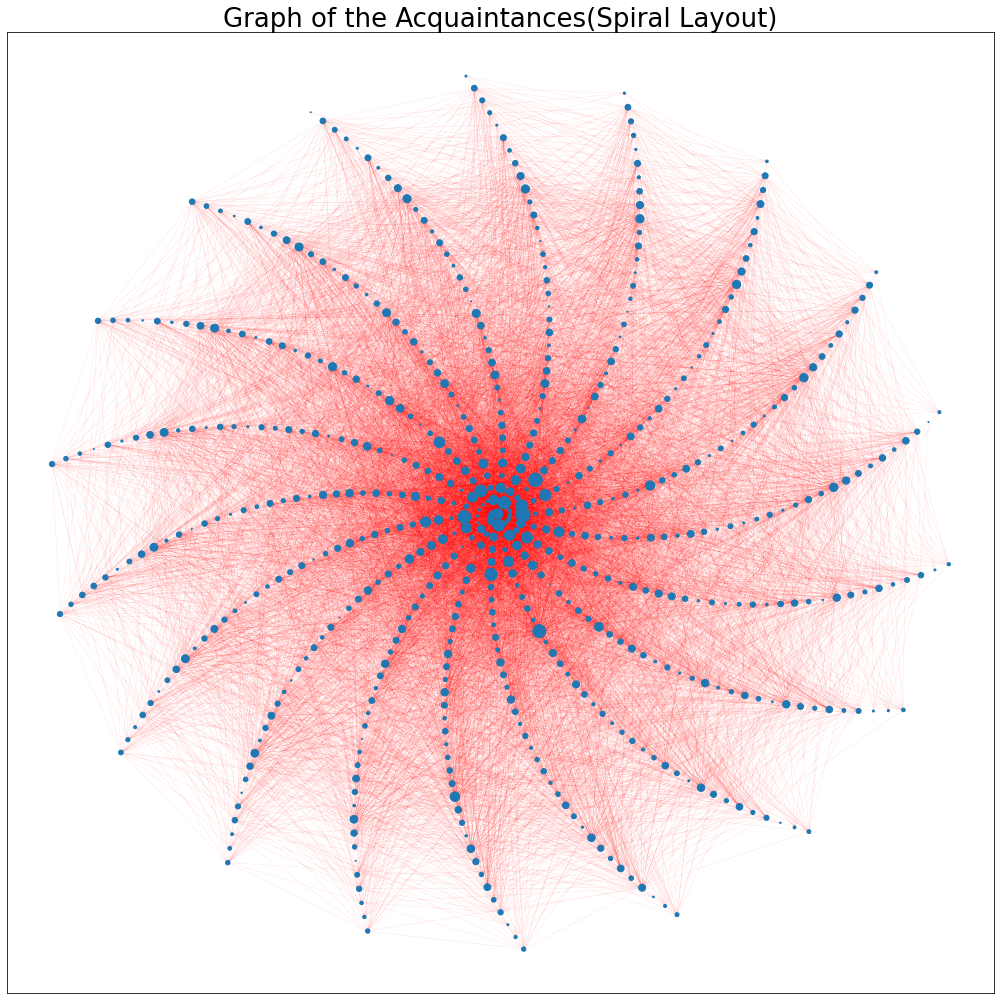

In [47]:
fig = plt.figure(figsize=(14,14))

plt.title('Graph of the Acquaintances(Spiral Layout)', fontsize=26)

pos = nx.spiral_layout(G)
nx.draw_networkx_nodes(G,
                       pos,
                       nodelist = np.array(G.nodes),
                       cmap=plt.get_cmap('jet'), 
                       #node_color = values,
                       node_size = np.around(np.array(np.array(G.degree)[:,1], dtype=np.uint32)/np.max(np.array(np.array(G.degree)[:,1], dtype=np.uint32))*200))
nx.draw_networkx_edges(G,
                       pos,
                       width=0.05,
                       #edgelist=red_edges,
                       edge_color='r', 
                       arrows=True)

fig.tight_layout()

plt.show()

These are all interesting by their looks, but the spring layout seems to be the most accurate one to show the network.

**Problem with labels**

There is a dozen of nodes present in this network, labeling them would make it crazy hard to read. Interactive plots would solve this!

https://plotly.com/python/network-graphs/

In [157]:
#import holoviews as hv always, holovws somehow fails
#import bokeh.io  fails too

import plotly.offline as py
import plotly.graph_objects as go

import plotly.express as px

In [87]:
def make_edge(x, y, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'red'),
                       hoverinfo = None,
                       mode      = 'lines')

In [159]:
#getting the positions
pos = nx.spring_layout(G)

#getting edge trace
edge_trace = []
for edge in G.edges():
    char_1 = edge[0]
    char_2 = edge[1]
    x0, y0 = pos[char_1]
    x1, y1 = pos[char_2]
        
    trace  = make_edge([x0, x1, None], [y0, y1, None], 
                        width = 0.3)
    edge_trace.append(trace)

#creating node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        hovertemplate = '<b>%{text}</b>',
                        text      = [],                      
                        
                        
                        #textposition = "top center",
                        textfont_size = 8,
                        mode      = 'markers',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
#getting node trace
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([5*np.log(G.degree()[node]+1) ])
    node_trace['text'] += tuple(['<b>' + decoderd[node] + '</b> : <b>' + str(G.degree()[node]) + '<b>'])
    
    
# Customize layout

layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
    height = 800,
    width = 800
)


# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()

Plotly express could make it better as it can handle pandas dataframes. Creating such dataframe could solve most of my hoverinfo issues. This does it for now!

## 5. Degree Distribution.

## 6. Clustering Coefficient and its average and the global

## 7. Degree Correlation